# **Milestone 4: Machine Learning Model**

In [312]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [313]:
data1 = pd.read_csv('/content/scaled_tc2.csv')

In [314]:
data2 = pd.read_csv('/content/cleaned_data_telecomchurn (1).csv')

In [315]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243553 entries, 0 to 243552
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Unnamed: 0           243553 non-null  int64 
 1   telecom_partner      243553 non-null  object
 2   gender               243553 non-null  object
 3   age                  243553 non-null  int64 
 4   age_decay_range      243553 non-null  int64 
 5   age_interval         243553 non-null  object
 6   state                243553 non-null  object
 7   city                 243553 non-null  object
 8   region               243553 non-null  object
 9   registration_year    243553 non-null  int64 
 10  registration_month   243553 non-null  int64 
 11  registration_day     243553 non-null  int64 
 12  num_dependents       243553 non-null  int64 
 13  single or not        243553 non-null  object
 14  estimated_salary     243553 non-null  int64 
 15  calls_made           243553 non-nu

In [316]:
# Concatinating data 1 and data 2 to include columns that will be used

data3 = pd.concat([data1[["registration_dayofweek","registration_dayofyear","days_since_registration","num_dependents","single_or_not_encoded"]], data2[["age","estimated_salary","calls_made","sms_sent","data_used","churn","calls_made_negative","sms_sent_negative","data_used_negative"]]],axis=1, join="inner")

In [317]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243553 entries, 0 to 243552
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   registration_dayofweek   243553 non-null  float64
 1   registration_dayofyear   243553 non-null  float64
 2   days_since_registration  243553 non-null  float64
 3   num_dependents           243553 non-null  int64  
 4   single_or_not_encoded    243553 non-null  int64  
 5   age                      243553 non-null  int64  
 6   estimated_salary         243553 non-null  int64  
 7   calls_made               243553 non-null  int64  
 8   sms_sent                 243553 non-null  int64  
 9   data_used                243553 non-null  int64  
 10  churn                    243553 non-null  int64  
 11  calls_made_negative      243553 non-null  int64  
 12  sms_sent_negative        243553 non-null  int64  
 13  data_used_negative       243553 non-null  int64  
dtypes: f

In [318]:
# Splitting the features

x = data3.drop('churn', axis=1)
y = data3['churn']

In [319]:
x

,registration_dayofweek,registration_dayofyear,days_since_registration,num_dependents,single_or_not_encoded,age,estimated_salary,calls_made,sms_sent,data_used,calls_made_negative,sms_sent_negative,data_used_negative
0,-0.499736,-1.587525,1.730623,4,0,25,124962,44,45,361,0,0,1
1,-0.499736,-1.587525,1.730623,2,0,55,130556,62,39,5973,0,0,0
2,-0.499736,-1.587525,1.730623,0,1,57,148828,49,24,193,0,0,0
3,-0.499736,-1.587525,1.730623,1,0,46,38722,80,25,9377,0,0,0
4,-0.499736,-1.587525,1.730623,2,0,26,55098,78,15,1393,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
243548,-0.499736,-0.447850,-1.730623,3,0,28,130580,28,9,4102,0,0,0
243549,-0.499736,-0.447850,-1.730623,0,1,52,82393,80,45,7521,0,0,0
243550,-0.499736,-0.447850,-1.730623,4,0,59,51298,26,4,6547,0,0,0
243551,-0.499736,-0.447850,-1.730623,2,0,49,83981,80,15,1125,0,0,0


In [320]:
y

,churn
0,0
1,0
2,1
3,1
4,0
...,...
243548,0
243549,0
243550,0
243551,0


In [321]:
# make the dataset 80% training and 20% testing

from sklearn.model_selection import train_test_split

x_train , x_test ,y_train , y_test = train_test_split(x , y , test_size = 0.6 , random_state = 42)

In [322]:
# Get best hyper parameter

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV
model = DecisionTreeClassifier()
parmaters = {
    'criterion' : ['gini' , 'entropy'],
    'max_depth' : [2,3,4,5],
    'min_samples_leaf' : [1,2],
    'min_samples_split' : [2,3]
}


grid = GridSearchCV(model , parmaters , cv = 5 , n_jobs= -1)

grid.fit(x_train , y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3]})

In [323]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [324]:
grid.best_score_

np.float64(0.8002894651208254)

In [325]:
# Implement best model

best_model = grid.best_estimator_
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [326]:
best_model.score(x_test , y_test)

0.7990036405441655

In [327]:
best_model.score(x_train , y_train)

0.8002997300376715

In [328]:
y_pred = best_model.predict(x_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89    116760
           1       0.00      0.00      0.00     29372

    accuracy                           0.80    146132
   macro avg       0.40      0.50      0.44    146132
weighted avg       0.64      0.80      0.71    146132


Confusion Matrix:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


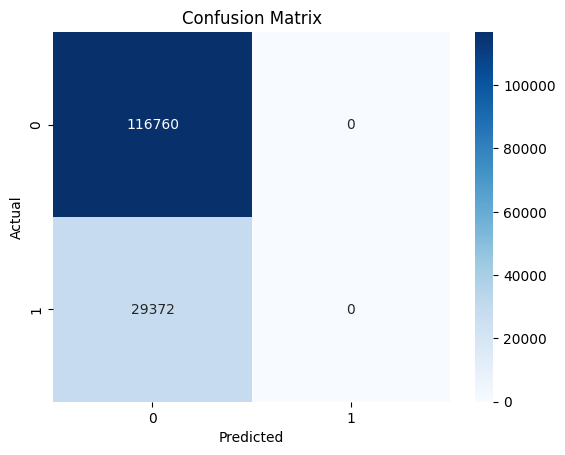

In [329]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# analyze the decision tree model

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

This model has __bad recall__ and __precision__.

---



In [330]:
# Apply SMOTE

from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(x,y)
x_train2 , x_test2 ,y_train2 , y_test2 = train_test_split(X_resampled, y_resampled , test_size = 0.4 , random_state = 42)

In [331]:
# Apply Random Forest

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(class_weight='balanced',max_depth=26,min_samples_leaf=1,min_samples_split=2 )
model.fit(x_train2, y_train2)

RandomForestClassifier(class_weight='balanced', max_depth=26)

In [332]:
model.score(x_train2, y_train2)

0.937857072550723

In [333]:
model.score(x_test2 , y_test2)

0.8046038990634288

In [334]:
y_pred2 = model.predict(x_test2)

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.88      0.82     77819
           1       0.86      0.73      0.79     77962

    accuracy                           0.80    155781
   macro avg       0.81      0.80      0.80    155781
weighted avg       0.81      0.80      0.80    155781


Confusion Matrix:


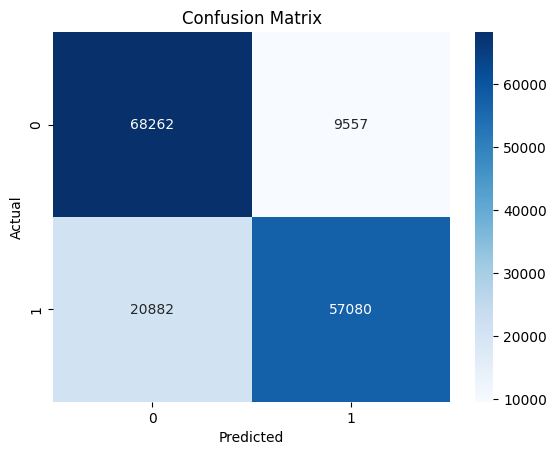

In [335]:
# Test random forest model

print("Classification Report:")
print(classification_report(y_test2, y_pred2))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test2, y_pred2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The model has __good precision__ and __recall__ but the test score __is not close__ to the train score.
___________________________